In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import random
from pprint import pprint


apikey = "25aa0614de3f2bbb9948d9a3c1731c43"

In [2]:
#Min and Max Values for Latitude and Longitude
#lat = [-90,90]
#lng = [-180,180]

'''
Creating random longitudea and latitudes. 
I spoke with Jacob and he said that it was okay to randomly generate latitudes 
and longitudes even though those coordinates may not necessarily correspond with a city and/or may be 
in a body of water. I had also considered importing the geography module and randomly selecting 500 queries that way.

'''

lat =[]
lng =[]

for x in range(0,500):
    rand_lat = random.uniform(-90,90)
    lat.append(rand_lat)
    rand_lng = random.uniform(-180,180)
    lng.append(rand_lng)

print(lat)
print(lng)

[52.91019003622776, -15.447485938419405, -1.7787153220528467, 18.151711520230563, 23.964244840752556, -14.62826885703329, -55.13159641085672, 3.053905350663058, -66.4901161170452, 77.48514578753031, -3.872779692080087, 18.57439513916033, 17.17850447700164, 1.2190905979634579, -0.7858790056072138, 44.760242205743396, -54.33414231024968, 71.5627260521247, 26.875706032540975, -87.57395412067353, 41.93508137523369, 8.758893108396933, 59.8193066516086, 61.40219283393023, 4.757388158540152, -66.00351493040915, 8.532860302929393, 29.65759290649345, -42.70941264070063, -13.590114767702559, 78.48399805583773, 21.811828224004657, -56.51616895654917, 66.86308428772307, 86.72910365007661, 19.042810869277275, 77.8983023795956, -11.633859844156191, 40.018294477504924, -1.1121544021529672, -50.19751603949955, 71.14041352922555, -78.33301762746093, -35.759347915384495, -14.987780846619998, -30.818377556839508, -81.89068417175751, 62.914092455808316, -72.57522952076056, 74.70856097576291, 9.73409486157

In [3]:
#Create a DataFrame

weather_df=pd.DataFrame({'Latitude': lat,'Longitude':lng})
weather_df.head()

,Latitude,Longitude
0,52.910190,-22.853074
1,-15.447486,-3.157545
2,-1.778715,-44.617732
3,18.151712,177.414131
4,23.964245,-44.181851


In [4]:
#create additional columns in dataframe

weather_df['Temperature']=""
weather_df['Humidity']=""
weather_df['Cloudiness']=""
weather_df['Wind Speed']=""

weather_df.head()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,52.910190,-22.853074,,,,
1,-15.447486,-3.157545,,,,
2,-1.778715,-44.617732,,,,
3,18.151712,177.414131,,,,
4,23.964245,-44.181851,,,,


In [5]:
#Testing URL before building for iterrows

base_url = "http://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&appid={}&units={}"
lat = 10.445556
lon = 69.120228
units = "imperial"

test = requests.get(base_url.format(lat, lon, apikey,units)).json()
pprint(test)


{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 10.45, 'lon': 69.12},
 'dt': 1522650774,
 'id': 0,
 'main': {'grnd_level': 1024.51,
          'humidity': 100,
          'pressure': 1024.51,
          'sea_level': 1024.55,
          'temp': 82.93,
          'temp_max': 82.93,
          'temp_min': 82.93},
 'name': '',
 'sys': {'message': 0.0073, 'sunrise': 1522632004, 'sunset': 1522676051},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 0.510193, 'speed': 3.15}}


In [6]:
test.keys()
#print(test['main']['humidity'])

dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])

In [7]:
#Create lists to store temperature, humidity, cloudiness, and wind speed
temp =[]
humidity =[]
cloudiness = [] 
wind_speed = [] 


for index, row in weather_df.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&appid={}&units={}"
    lat = row['Latitude']
    lng = row['Longitude']
    response = requests.get(base_url.format(lat, lon, apikey, units)).json()
    print("Retrieving the weather information for latitude ={} and longitude ={} using the URL: {}".format(lat, lng, base_url.format(lat, lon, apikey, units)))
    weather_df.set_value(index, "Temperature", response['main']['temp'])
    weather_df.set_value(index, "Humidity", response['main']['humidity'])
    weather_df.set_value(index, "Cloudiness", response['clouds']['all'])
    weather_df.set_value(index, "Wind Speed", response['wind']['speed'])

weather_df

Retrieving the weather information for latitude =52.91019003622776 and longitude =-22.8530741501624 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=52.91019003622776&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial


C:\Users\gkchan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\gkchan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\gkchan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\gkchan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Retrieving the weather information for latitude =-15.447485938419405 and longitude =-3.1575453354780336 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-15.447485938419405&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-1.7787153220528467 and longitude =-44.617732371811115 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-1.7787153220528467&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =18.151711520230563 and longitude =177.4141314194573 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=18.151711520230563&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =23.964244840752556 and longitude =-44.18185083615833 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=23.964244840752556&lon=69.120228&appid=25aa0614de3f2bbb9948d9a

Retrieving the weather information for latitude =86.72910365007661 and longitude =-44.074175232011754 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=86.72910365007661&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =19.042810869277275 and longitude =-122.25298113106098 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=19.042810869277275&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =77.8983023795956 and longitude =-108.25813883013058 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=77.8983023795956&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-11.633859844156191 and longitude =-93.28473000461949 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-11.633859844156191&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731

Retrieving the weather information for latitude =-75.75943918330002 and longitude =-113.69165539091163 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-75.75943918330002&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =18.423079260346142 and longitude =97.11211357809947 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=18.423079260346142&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-25.22753095978733 and longitude =-160.97289802197778 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-25.22753095978733&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-76.60915006654614 and longitude =56.40924145752763 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-76.60915006654614&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c173

Retrieving the weather information for latitude =83.44370048540517 and longitude =58.47756345004487 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=83.44370048540517&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =33.897938323105436 and longitude =161.79441449354454 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=33.897938323105436&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =62.65284419064716 and longitude =-133.87169037419778 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=62.65284419064716&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-64.15500088023828 and longitude =-165.1341922643525 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-64.15500088023828&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43

Retrieving the weather information for latitude =-44.79166166879588 and longitude =-177.54353733420925 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-44.79166166879588&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-28.98940310228162 and longitude =-10.813643008232873 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-28.98940310228162&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-87.25152839958584 and longitude =137.34081427813481 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-87.25152839958584&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =29.31952002675341 and longitude =-119.5283295893869 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=29.31952002675341&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c173

Retrieving the weather information for latitude =22.5669238774682 and longitude =12.162363117064785 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=22.5669238774682&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =8.113747998271648 and longitude =38.601969206068475 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=8.113747998271648&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =66.26199287790263 and longitude =-174.3731988724934 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=66.26199287790263&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =81.13137589542657 and longitude =177.29413887261688 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=81.13137589542657&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units

Retrieving the weather information for latitude =-17.603155208249632 and longitude =45.96943303207382 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-17.603155208249632&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =76.41021327867676 and longitude =29.334074060947216 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=76.41021327867676&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =29.234837712423854 and longitude =-34.23914908947421 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=29.234837712423854&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-28.060450865100968 and longitude =-103.90433201837256 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-28.060450865100968&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1

Retrieving the weather information for latitude =-59.1168030109322 and longitude =-110.49579881055024 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-59.1168030109322&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-7.257947444158972 and longitude =11.658057121998127 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-7.257947444158972&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =84.00632863496438 and longitude =-128.28044354423403 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=84.00632863496438&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-20.939413761964914 and longitude =46.78944675243798 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-20.939413761964914&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731

Retrieving the weather information for latitude =-88.73983952322979 and longitude =-99.77159360989486 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-88.73983952322979&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =49.8742808725101 and longitude =-63.299323975104244 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=49.8742808725101&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-20.740696134291568 and longitude =-88.80521421684746 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-20.740696134291568&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =58.88486832280839 and longitude =60.517937278038715 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=58.88486832280839&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c4

Retrieving the weather information for latitude =72.13772331915646 and longitude =128.8574985332039 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=72.13772331915646&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =54.56544394214231 and longitude =10.318475741556796 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=54.56544394214231&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =17.878084375747505 and longitude =-6.152186667758343 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=17.878084375747505&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =56.94921710819844 and longitude =130.02583357377137 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=56.94921710819844&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&un

Retrieving the weather information for latitude =-20.584280829899086 and longitude =41.21492916854052 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-20.584280829899086&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-68.49720575470175 and longitude =120.13569315195713 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-68.49720575470175&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =60.10174673942049 and longitude =99.61572909521283 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=60.10174673942049&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-26.056679693161527 and longitude =78.12831066889567 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-26.056679693161527&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731

Retrieving the weather information for latitude =15.259754371410125 and longitude =81.54919966834234 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=15.259754371410125&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-41.004708402340086 and longitude =-116.0926786984962 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-41.004708402340086&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =78.51165288493891 and longitude =-99.71374446931156 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=78.51165288493891&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =56.47824022399388 and longitude =-89.69289535567154 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=56.47824022399388&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c4

Retrieving the weather information for latitude =-22.20264881825267 and longitude =-149.24196154546877 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-22.20264881825267&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =34.31857159681074 and longitude =171.5288444562858 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=34.31857159681074&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-40.544037639244145 and longitude =78.97241238940109 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-40.544037639244145&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-83.51807983391015 and longitude =12.135519994165207 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-83.51807983391015&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731

Retrieving the weather information for latitude =-23.03258277625666 and longitude =-86.89092280437117 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-23.03258277625666&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =19.70787941282221 and longitude =-40.146138021037984 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=19.70787941282221&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-33.87922580026577 and longitude =-18.387296796103755 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-33.87922580026577&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-7.67837553103773 and longitude =-20.436034810395995 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-7.67837553103773&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731

Retrieving the weather information for latitude =60.01178035542557 and longitude =-132.0702277074174 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=60.01178035542557&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-56.613343676830794 and longitude =-99.42021426307149 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-56.613343676830794&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =88.82337537135155 and longitude =-157.10075417099986 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=88.82337537135155&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =51.84587818438678 and longitude =-153.19877822082816 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=51.84587818438678&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c

Retrieving the weather information for latitude =88.91110789111232 and longitude =129.7073393829565 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=88.91110789111232&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =-20.25150544554917 and longitude =128.15627534292804 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=-20.25150544554917&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =29.73181862025517 and longitude =149.85472701927125 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=29.73181862025517&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&units=imperial
Retrieving the weather information for latitude =87.14379738457325 and longitude =135.64356704332693 using the URL: http://api.openweathermap.org/data/2.5/weather?lat=87.14379738457325&lon=69.120228&appid=25aa0614de3f2bbb9948d9a3c1731c43&un

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,52.910190,-22.853074,28.4,79,75,17.9
1,-15.447486,-3.157545,82.12,100,76,14.67
2,-1.778715,-44.617732,86.35,98,68,4.72
3,18.151712,177.414131,79.6,100,0,8.75
4,23.964245,-44.181851,91.84,43,20,10.76
5,-14.628269,148.264439,83.11,99,68,17.58
6,-55.131596,-159.465969,36.49,100,44,24.29
7,3.053905,-96.979136,83.83,100,56,4.61
8,-66.490116,-47.836385,19.84,100,92,12.44
9,77.485146,158.460507,-1.22,93,68,26.31


In [8]:
#Export to CSV

weather_df.to_csv("Resources/WeatherPy.csv")

Text(0,0.5,'Temperature (F)')

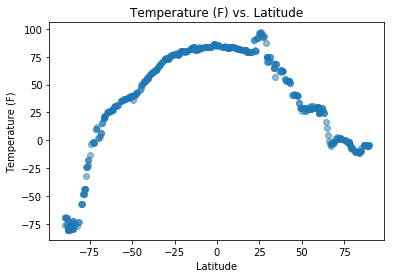

In [9]:
#Creating a scatterplot for Temperature vs. Latitude

x_lat = weather_df['Latitude']
y_Temp = weather_df['Temperature']

plt.scatter(x_lat,y_Temp,alpha=0.5)
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")


Text(0,0.5,'Humidity (%)')

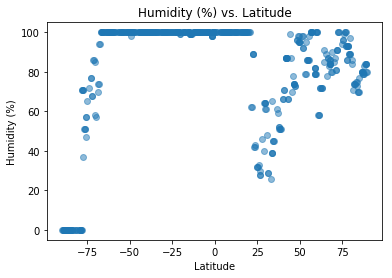

In [10]:
#Creating a scatterplot for Humidity vs. Latitude

x_lat = weather_df['Latitude']
y_Humidity = weather_df['Humidity']

plt.scatter(x_lat,y_Humidity,alpha=0.5)
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


Text(0,0.5,'Cloudiness (%)')

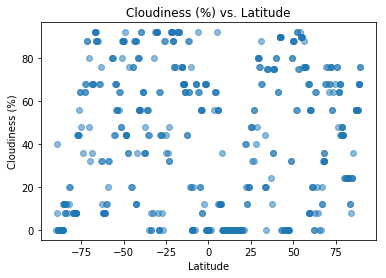

In [11]:
#Creating a scatterplot for Cloudiness vs. Latitude

x_lat = weather_df['Latitude']
y_Cloudiness = weather_df['Cloudiness']

plt.scatter(x_lat,y_Cloudiness,alpha=0.5)
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


Text(0,0.5,'Wind Speed (mph)')

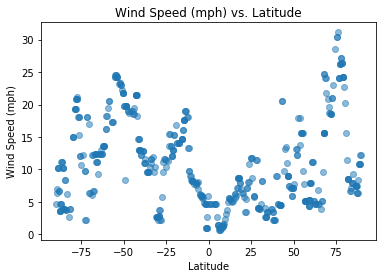

In [12]:
#Creating a scatterplot for Windspeed vs. Latitude

x_lat = weather_df['Latitude']
y_wind = weather_df['Wind Speed']

plt.scatter(x_lat,y_wind,alpha=0.5)
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


In [ ]:
#Observable Trends

#1: It is warmer near the equator
#2: There is a smaller variance in wind speeds closer to the equator (all the wind speeds seem to be below 10 mph)
#3: There seems to be no correlation between cloudiness and latitude